# Henonの計算

In [2]:
%load_ext autoreload
%autoreload 2

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from da.henon import gen_henon
from da.scheme import rk4, euler

In [35]:
def plot_henon(result):
    result = np.array(result)

    # t vs. x, y
    fig1, ax1 = plt.subplots()
    ax1.plot(result[:, 0], label="x", lw=0.2)
    ax1.plot(result[:, 1], label="y", lw=0.2)
    ax1.set_xlabel('t')
    ax1.set_ylabel('$ x $')
    ax1.legend()
    ax1.set_title('plot components')

    # 3次元plot
    fig2 = plt.figure()
    ax2 = fig2.add_subplot()
    ax2.plot(result[:, 0], result[:, 1], lw=0.2)
    
    ax2.set_xlabel('$x_1$')
    ax2.set_ylabel('$x_2$')
    # plt.title('first three components of Lorenz96')
    
    
    plt.show()

In [48]:
# params
a = 1.4
b = 0.3

# dt: 時間刻み
dt = 0.01

# N: 時間ステップ数
N = 4000*12 + 200

# 観測間隔
obs_per = 12

# spin up
spin_up = 200

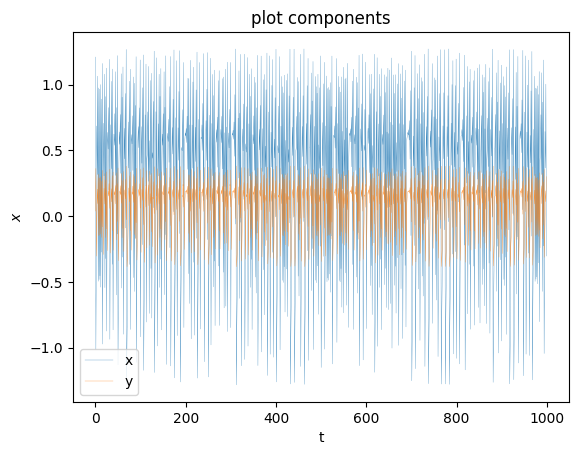

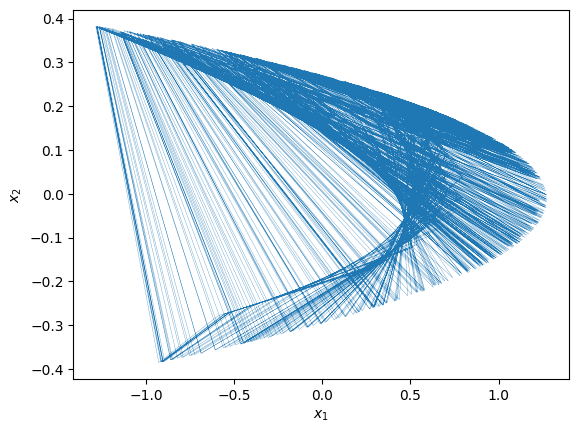

In [69]:
# 初期値の設定
x0 = np.array([1., 1.])

henon = gen_henon(a, b)
result = np.zeros((N,len(x0)))
x = x0
for n in range(1,N):
    x = henon(x)
    result[n] = x[:]

plot_henon(result[-1000:])

x_true = result[spin_up:][::obs_per]

In [50]:
import seaborn as sns
import plotly.io as pio
import plotly.graph_objects as go
from matplotlib.colors import to_hex
pio.renderers.default = 'notebook'

n_colors = 10
pallet_name = "ch:s=-.2,r=.6" # ["rocket_r", "ch:s=-.2,r=.6"]


# plot
colors = sns.color_palette(pallet_name, as_cmap=False, n_colors=n_colors)
data = []
for i in range(10):
    color = to_hex(colors[i])
    X, Y = result[i*len(result)//10:(i+1)*len(result)//10].T
    data.append(go.Scatter(x=X, y=Y, mode='markers', marker=dict(size=0.3, color=color)))

# add data
fig = go.Figure(data=data)
fig.update_layout(
    width=400,
    height=400,
    showlegend=False,
    scene = dict(
        xaxis = dict(visible=False),
        yaxis = dict(visible=False),
        zaxis =dict(visible=False)
        )
    )
fig.show()

## 観測

In [64]:
# obs variance (R = r0*I)
r0 = 0.01

In [65]:
np.random.seed(0)
x_true = result
noise = np.random.normal(loc=0, scale=np.sqrt(r0), size=x_true.shape) # R = r0*I
x_obs = x_true + noise
print(x_obs.shape)

(48200, 2)


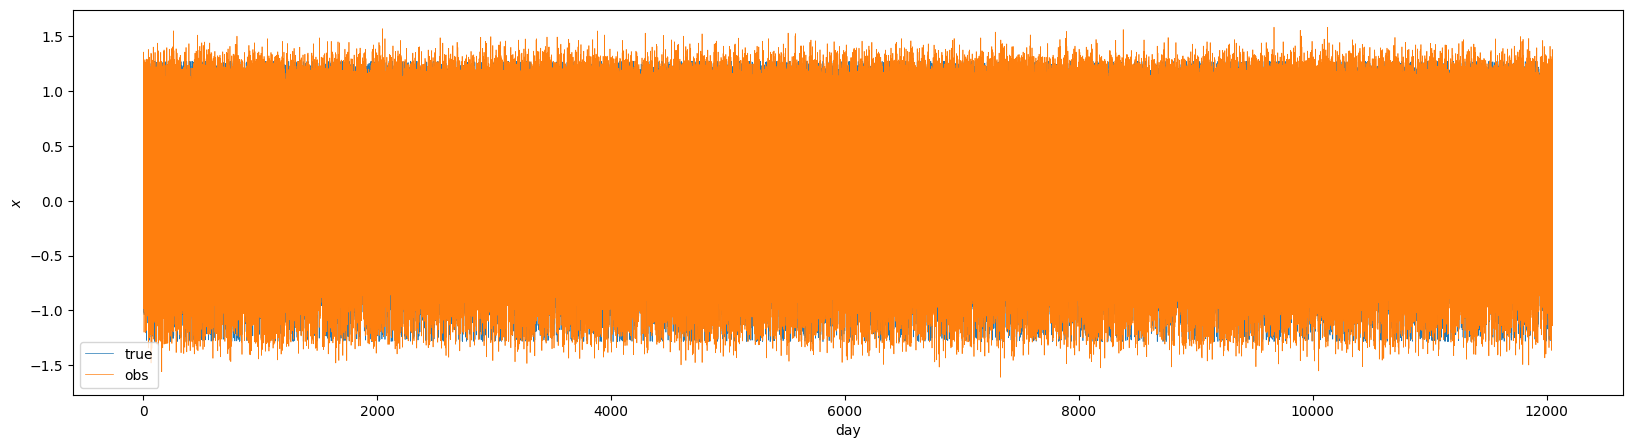

In [66]:
dates = [time/4 for time in range(len(x_true))]
fig1, ax1 = plt.subplots(figsize=(20, 5))
ax1.plot(dates, x_true[:, 0], '-', label='true', lw=0.5)
ax1.plot(dates, x_obs[:, 0], '-', label='obs', lw=0.5)
ax1.set_xlabel('day')
ax1.set_ylabel('$ x $')
# plt.title('20th component vs. time')
_ = plt.legend()

